In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as path_effects
import os

from mesagrid import Track
from mesagrid import star_plots as sp

Updated star.py 2025-06-26 14:36:25.633994
Updated starplots.py 2025-06-26 14:36:25.786876


In [3]:
colors = ['#264653', '#287271', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51']
patheffects = [path_effects.Stroke(linewidth=4, foreground='white'), path_effects.Normal()]

In [4]:
track1_0 = Track(r'work/Track1_0', name='Track 1 Pre He Flash')
track1_1 = Track(r'work/Track1_1', name='Track 1-1', color=colors[1])
track1_2 = Track(r'work/Track1_2', name='Track 1-2', color=colors[2])
track1_3 = Track(r'work/Track1_3', name='Track 1-3', color=colors[0])
track1_4 = Track(r'work/Track1_4', name='Track 1-4', color=colors[3])
track1_5 = Track(r'work/Track1_5', name='Track 1-5', color=colors[4])
track1_6 = Track(r'work/Track1_6', name='Track 1-6', color=colors[5])

tracks1 = [track1_1, track1_2, track1_3, track1_4, track1_5, track1_6]

track2_0 = Track(r'work/Track2_0', name='Track 2 Pre He Flash')
track2_1 = Track(r'work/Track2_1', name='Track 2-1', color=colors[1])
track2_2 = Track(r'work/Track2_2', name='Track 2-2', color=colors[2])
track2_3 = Track(r'work/Track2_3', name='Track 2-3', color=colors[0])
track2_4 = Track(r'work/Track2_4', name='Track 2-4', color=colors[3])
track2_5 = Track(r'work/Track2_5', name='Track 2-5', color=colors[4])
track2_6 = Track(r'work/Track2_6', name='Track 2-6', color=colors[5])

tracks1 = [track1_1, track1_2, track1_3, track1_4, track1_5, track1_6]
tracks2 = [track2_1, track2_2, track2_3, track2_4, track2_5, track2_6]

# HR Diagrams

Loading Frequencies:   0%|          | 0/1500 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1364 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/2889 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1583 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1784 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1618 [00:00<?, ?it/s]

[None, None, None, None, None, None, None]

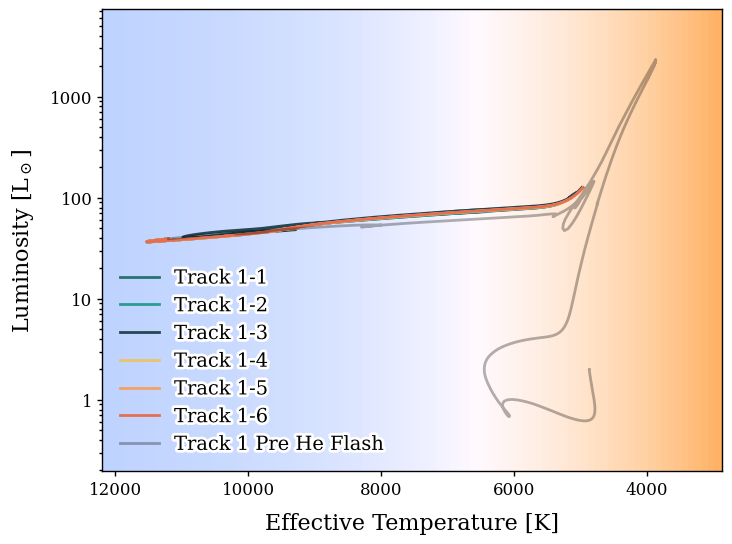

In [5]:
# First set of models (M=0.59, Z=0.001)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

sp.plot_hr(track1_0, alpha=0, label='', alpha_colors=1)
for track in tracks1:
    sp.plot_hr(track, ax=ax)
sp.plot_hr(track1_0, alpha=0.3)


[text.set_path_effects(patheffects) for text in ax.legend(frameon=False, loc='lower left').get_texts()]


Loading Frequencies:   0%|          | 0/1100 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1758 [00:00<?, ?it/s]

Loading Frequencies:   0%|          | 0/1518 [00:00<?, ?it/s]

(8000.0, 3500.0)

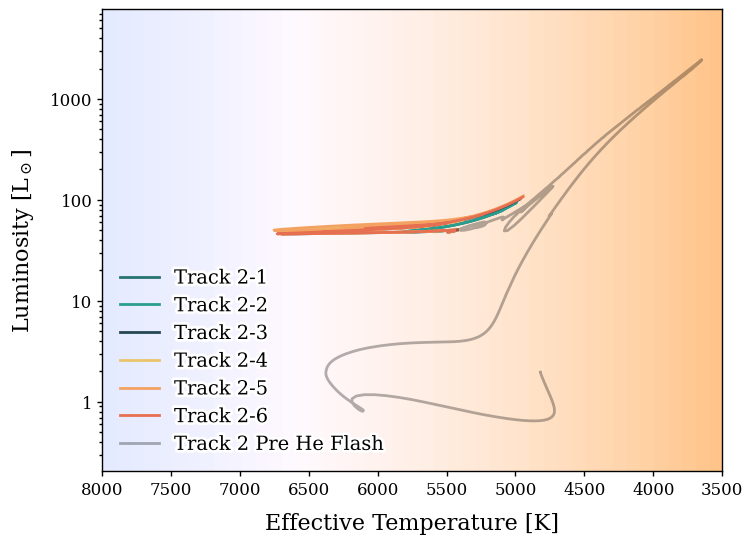

In [6]:
# Second set of models (M=0.63, Z=0.002)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

sp.plot_hr(track2_0, alpha=0, label='', alpha_colors=1)
for track in tracks2:
    sp.plot_hr(track, ax=ax)
sp.plot_hr(track2_0, alpha=0.3)


[text.set_path_effects(patheffects) for text in ax.legend(frameon=False, loc='lower left').get_texts()]
ax.set_xlim(8000, 3500)

# Kippenhahn Diagrams

C:\Users\mkoro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mesagrid\star_plots.py:434: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),
C:\Users\mkoro\AppData\Local\Temp\ipykernel_136760\3967951867.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


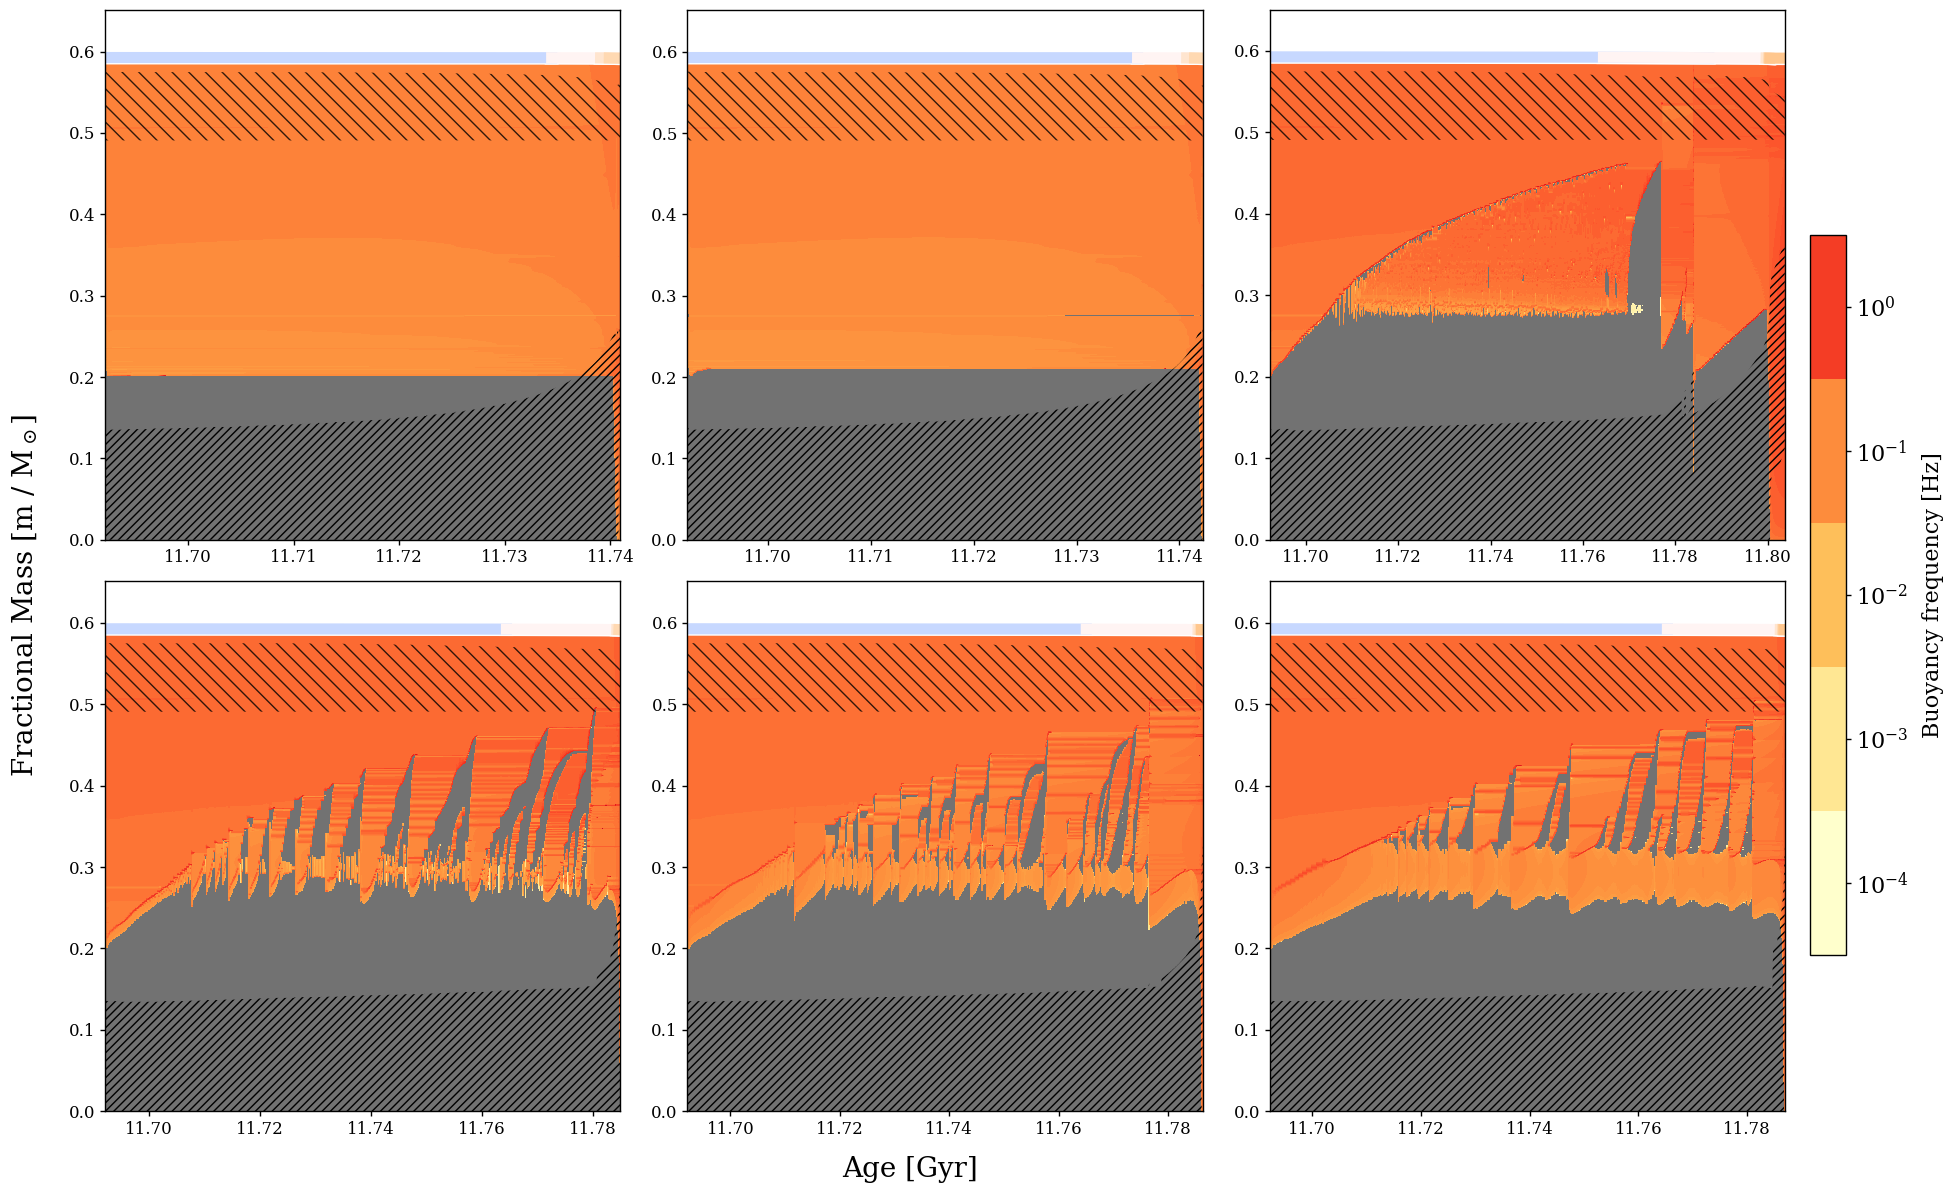

In [15]:
# First set of models (M=0.59, Z=0.001)
fig, axs = plt.subplots(2, 3, figsize=(18,12))

for i, track in enumerate(tracks1):
    sp.plot_kippenhahn(track, ax=axs.flatten()[i], burning_threshold=0.001, show_colorbar=False)

for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')

fig = plt.gcf()

fig.supxlabel('Age [Gyr]', fontsize=20)
fig.supylabel(r'Fractional Mass [m / M$_\odot$]', x=0, fontsize=20)

norm = matplotlib.colors.Normalize(vmin=-4, vmax=2)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap='YlOrRd')
vmin = int(norm.vmin)
vmax = int(norm.vmax)

cbar_ax = fig.add_axes([1, 0.2, 0.02, 0.6])
cb = fig.colorbar(cmap, label=r'Buoyancy frequency $\mathrm{log~N}$/Hz',
            boundaries=np.array(range(vmin, vmax, 1))-0.5,
            ticks=np.array(range(vmin, vmax+1, 1)), cax=cbar_ax)
cb.ax.minorticks_off()
cb.ax.set_yticklabels([rf'$10^{{{t}}}$' for t in np.array(range(vmin, vmax+1, 1))], fontsize=16)
cb.set_label(label=r'Buoyancy frequency [Hz]', labelpad=10)

fig.tight_layout()

C:\Users\mkoro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\mesagrid\star_plots.py:434: RuntimeWarning: divide by zero encountered in log10
  Z = np.array([sp.interpolate.interp1d(g.m/g.M, np.log10(g.N *  10**6/(2*np.pi)),
C:\Users\mkoro\AppData\Local\Temp\ipykernel_136760\389340831.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


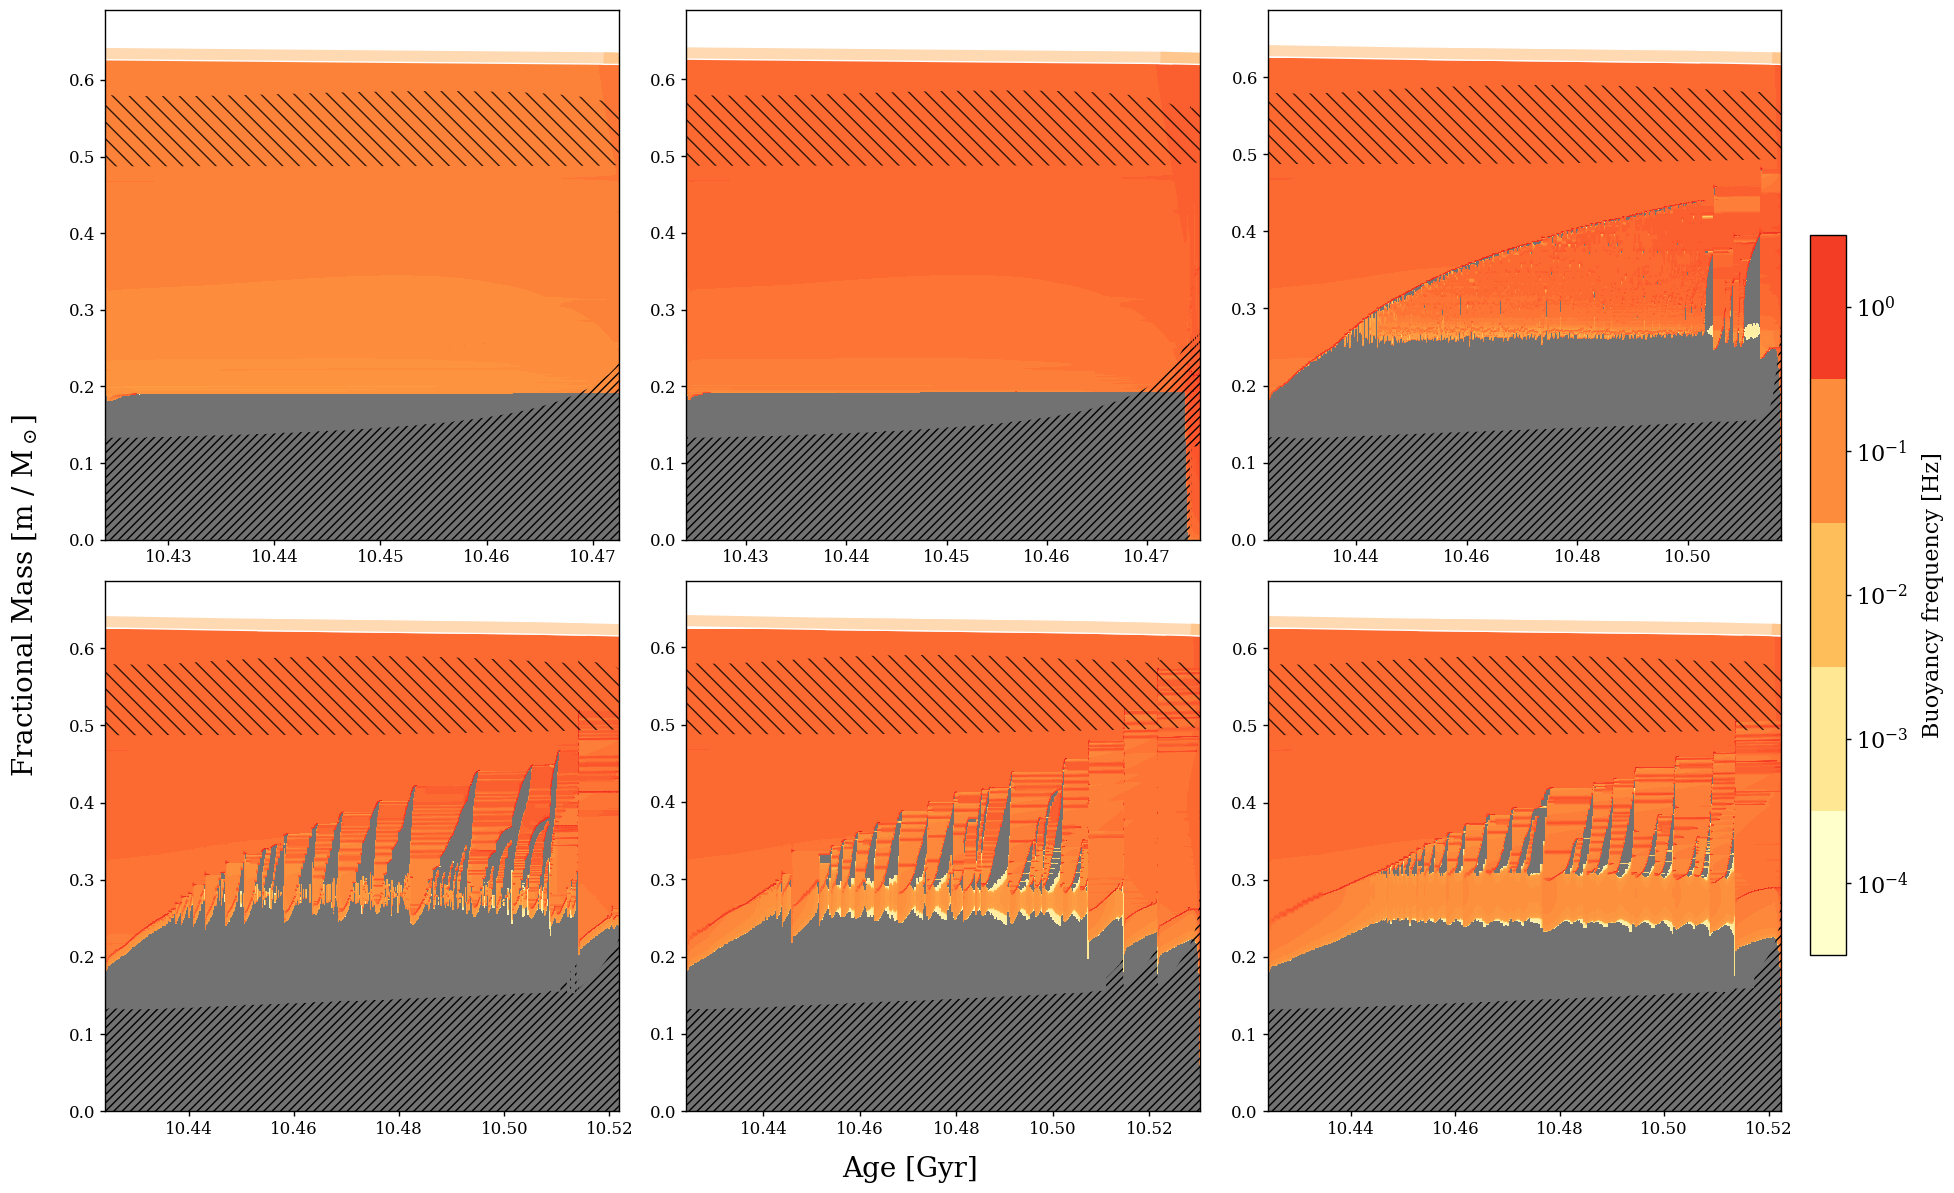

In [16]:
# Second set of models (M=0.63, Z=0.002)
fig, axs = plt.subplots(2, 3, figsize=(18,12))

for i, track in enumerate(tracks2):
    sp.plot_kippenhahn(track, ax=axs.flatten()[i], show_colorbar=False, burning_threshold=0.001)

for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')


fig = plt.gcf()

fig.supxlabel('Age [Gyr]', fontsize=20)
fig.supylabel(r'Fractional Mass [m / M$_\odot$]', x=0, fontsize=20)

norm = matplotlib.colors.Normalize(vmin=-4, vmax=2)
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap='YlOrRd')
vmin = int(norm.vmin)
vmax = int(norm.vmax)

cbar_ax = fig.add_axes([1, 0.2, 0.02, 0.6])
cb = fig.colorbar(cmap, label=r'Buoyancy frequency $\mathrm{log~N}$/Hz',
            boundaries=np.array(range(vmin, vmax, 1))-0.5,
            ticks=np.array(range(vmin, vmax+1, 1)), cax=cbar_ax)
cb.ax.minorticks_off()
cb.ax.set_yticklabels([rf'$10^{{{t}}}$' for t in np.array(range(vmin, vmax+1, 1))], fontsize=16)
cb.set_label(label=r'Buoyancy frequency [Hz]', labelpad=10)

fig.tight_layout()

# Composition Diagrams

In [18]:
# Profile indices (in order of ledoux, schwarzschild, premix, step alpha=0.1, 0.2, 0.3) where the fundamental period ~ 24 hours:

f24 = [1188, 1183, 2367, 1246, 1386, 1225]

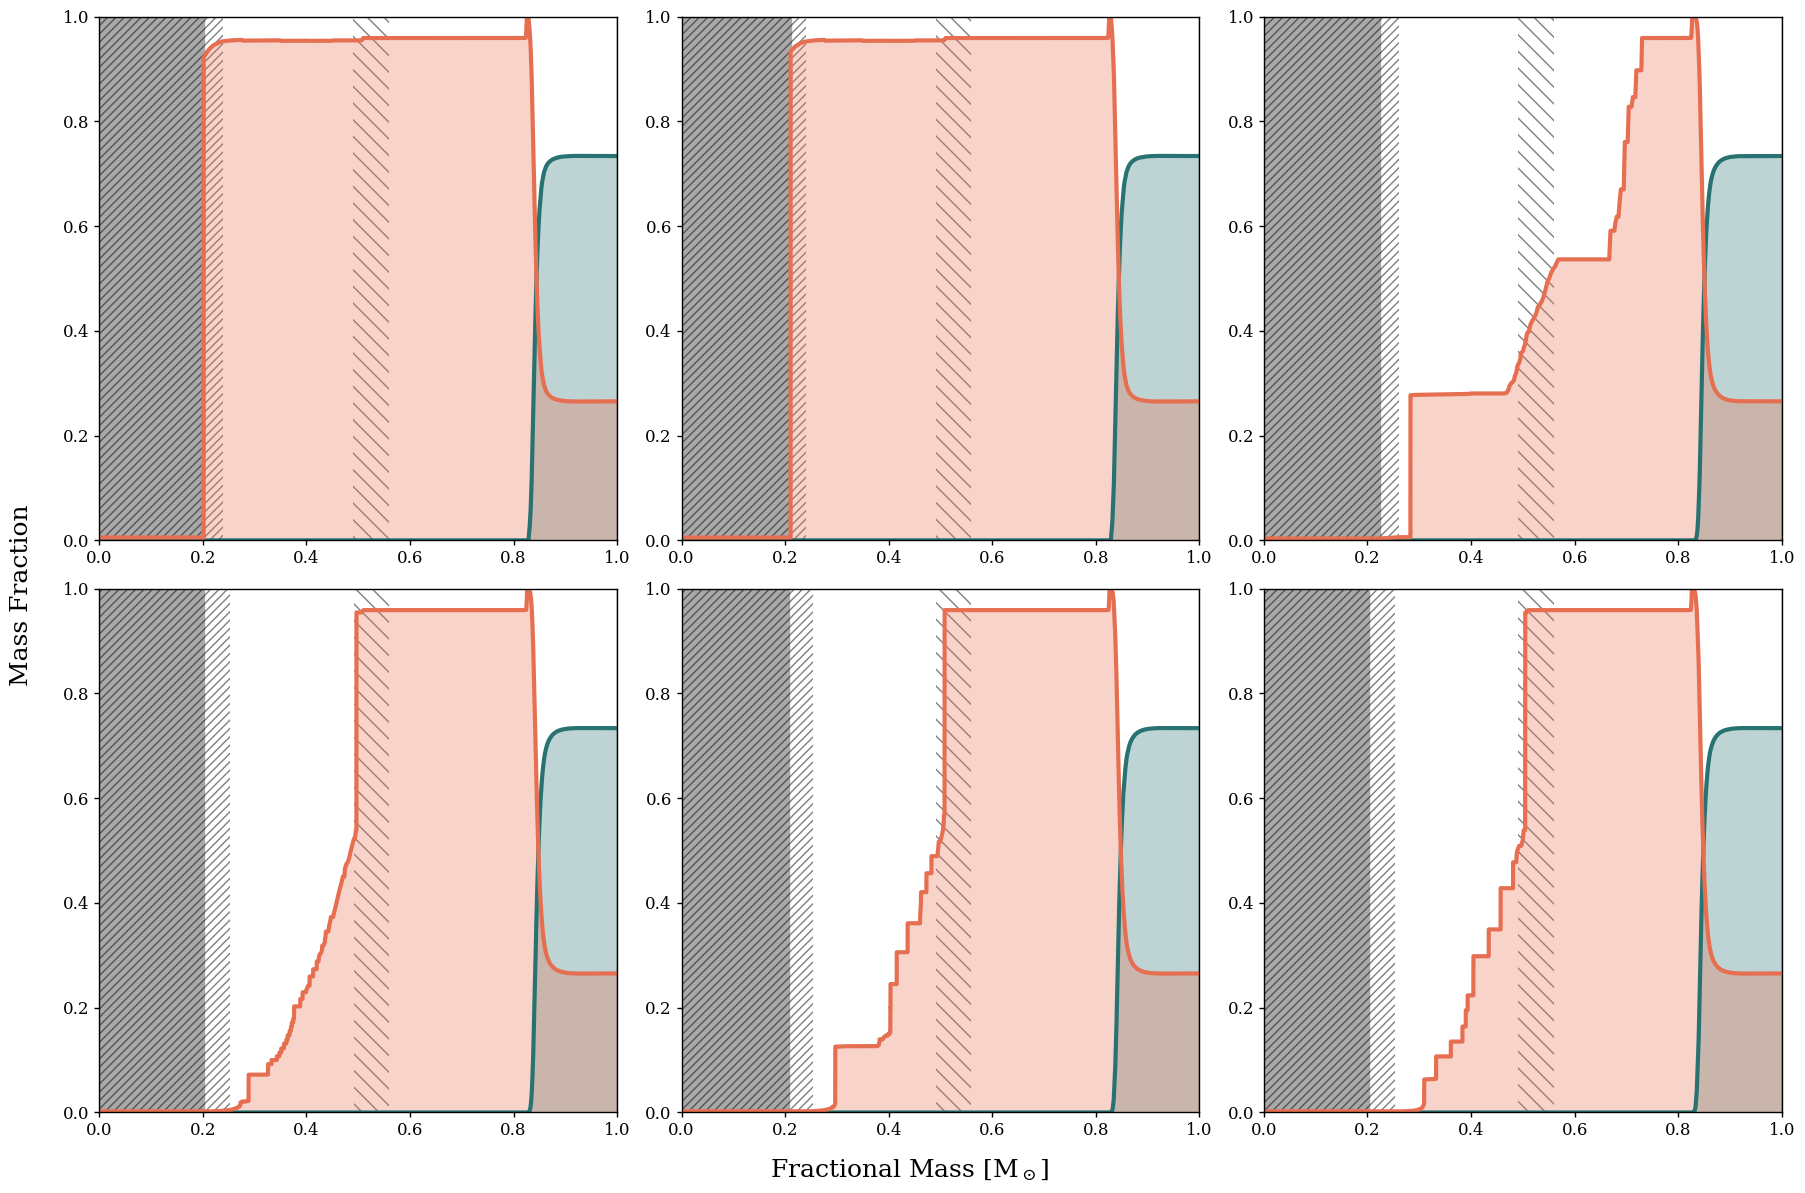

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(18,12))

for i, track in enumerate(tracks1):
    sp.plot_composition(track, f24[i], ax=axs.flatten()[i], burning_threshold=0.001)

for ax_row in axs:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')

fig.supxlabel(r'Fractional Mass [M$_\odot$]', fontsize=18)
fig.supylabel('Mass Fraction', x=0, fontsize=18)

fig.tight_layout()

# Temperature Gradient Profiles

C:\Users\mkoro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tomso\utils.py:176: RuntimeWarning: invalid value encountered in divide
  def grad_r(self): return 3*self.kappa*self.P*self.L_r/(64.*np.pi*sigma_SB*self.G*self.m*self.T**4)


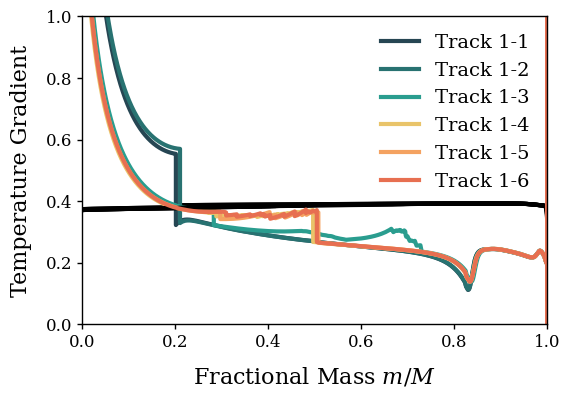

In [24]:
for i, track in enumerate(tracks1):
    sp.plot_temperature_gradients(track, f24[i], c1='k', c2=colors[i], label=track.name)

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[1::2], labels[1::2], frameon=False)

fig.tight_layout()

# Fundamental Period Change

[None, None, None, None, None, None]

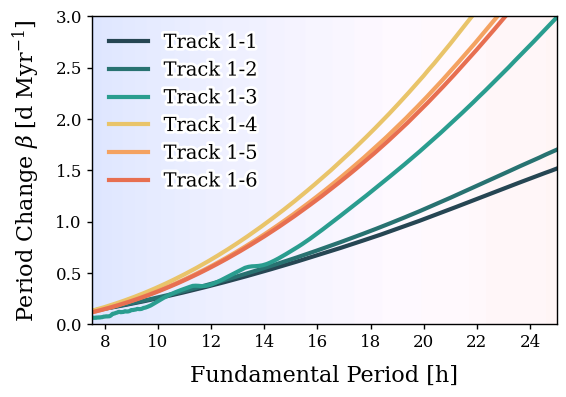

In [29]:
for i, track in enumerate(tracks1):
    if i==0:
        sp.plot_beta(track, color=colors[i], max=1200)
    else:
        sp.plot_beta(track, color=colors[i])

sp.plot_colors_interp(track1_1, track1_1.history['Fundamental Period'])

plt.xlim(7.5, 25)
plt.ylim(0, 3)

[text.set_path_effects(patheffects) for text in plt.legend(frameon=False, fontsize=14).get_texts()]

# Gravity Mode Period Spacing

[None, None, None, None, None, None]

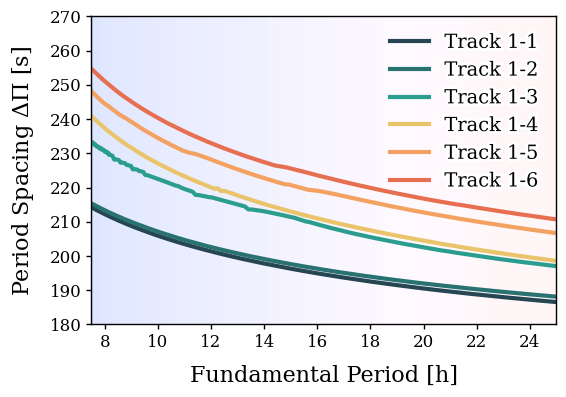

In [30]:
for i, track in enumerate(tracks1):
    if i==0 or i==1:
        sp.plot_deltapi_vs_x(track, x='Fundamental Period', color=colors[i], label=track.name, max=1250,)
    else:
        sp.plot_deltapi_vs_x(track, x='Fundamental Period', color=colors[i], label=track.name)

sp.plot_colors_interp(track1_1, track1_1.history['Fundamental Period'])

plt.xlim(7.5, 25)
plt.ylim(180, 270)
plt.xlabel('Fundamental Period [h]')

[text.set_path_effects(patheffects) for text in plt.legend(frameon=False, fontsize=14).get_texts()]

Text(0.5, 0, 'Core Helium Mass Fraction')

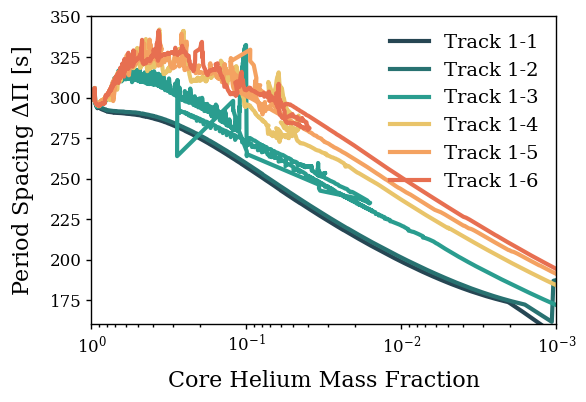

In [32]:
for i, track in enumerate(tracks1):
    sp.plot_deltapi_vs_x(track, x='center_he4', color=colors[i], label=track.name)

plt.xscale('log')
plt.xlim(1, 0.001)
plt.ylim(160, 350)
plt.legend(frameon=False)
plt.xlabel('Core Helium Mass Fraction')

Text(0.5, 0, 'Core Helium Mass Fraction')

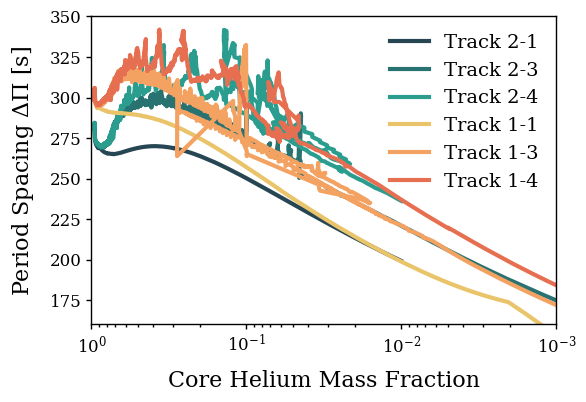

In [43]:
for i, track in enumerate([track2_1, track2_3, track2_4, track1_1, track1_3, track1_4]):
    sp.plot_deltapi_vs_x(track, x='center_he4', color=colors[i], label=track.name)

plt.xscale('log')
plt.xlim(1, 0.001)
plt.ylim(160, 350)
plt.legend(frameon=False)
plt.xlabel('Core Helium Mass Fraction')

# Binary Evolution Tracks

In [57]:
binary_m12_noov = Track(r'work/Binary_M1.2_NoOvershoot', name=r'Binary M$_i$ = 1.2 No Overshoot', color=colors[0])
binary_m12_ov = Track(r'work/Binary_M1.2_NoOvershoot', name=r'Binary M$_i$ = 1.2 Overshoot', color=colors[3])
binary_m15_noov = Track(r'work/Binary_M1.5_NoOvershoot', name=r'Binary M$_i$ = 1.5 No Overshoot', color=colors[1])
binary_m15_ov = Track(r'work/Binary_M1.5_Overshoot', name=r'Binary M$_i$ = 1.5 Overshoot', color=colors[4])
binary_m2_noov = Track(r'work/Binary_M2_NoOvershoot', name=r'Binary M$_i$ = 2 No Overshoot', color=colors[2])
binary_m2_ov = Track(r'work/Binary_M2_Overshoot', name=r'Binary M$_i$ = 2 Overshoot', color=colors[5])

tracks_binary = [binary_m12_noov, binary_m15_noov, binary_m2_noov, binary_m12_ov, binary_m15_ov, binary_m2_ov]

Text(0.5, 0, 'Core Helium Mass Fraction')

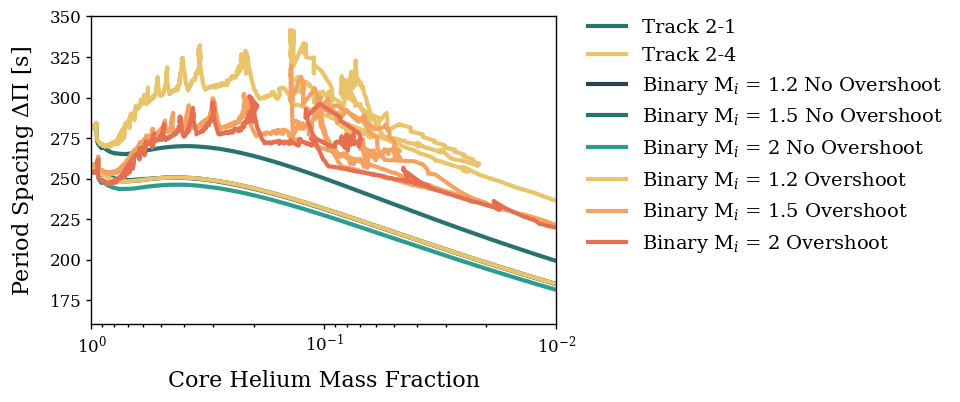

In [62]:
for i, track in enumerate([track2_1, track2_4]+ tracks_binary):
    sp.plot_deltapi_vs_x(track, x='center_he4', label=track.name)

plt.xscale('log')
plt.xlim(1, 0.01)
plt.ylim(160, 350)
plt.legend(frameon=False, loc=(1.05, 0.2))
plt.xlabel('Core Helium Mass Fraction')

# Diffusion

In [60]:
diffusion_noov = Track(r'work/Diffusion_NoOvershoot', name=r'Diffusion No Overshoot', color=colors[0])
diffusion_ov = Track(r'work/Diffusion_Overshoot', name=r'Diffusion Overshoot', color=colors[3])

Text(0.5, 0, 'Core Helium Mass Fraction')

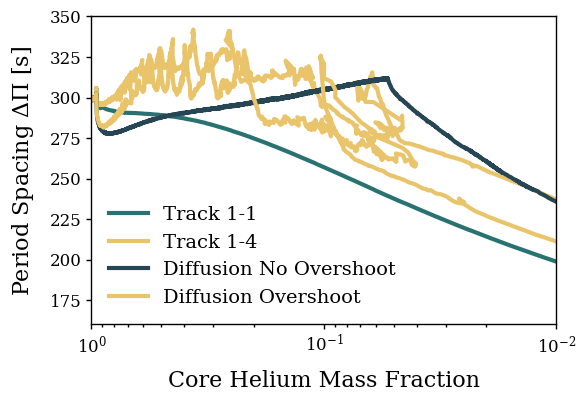

In [64]:
for i, track in enumerate([track1_1, track1_4]+ [diffusion_noov, diffusion_ov]):
    sp.plot_deltapi_vs_x(track, x='center_he4', label=track.name)

plt.xscale('log')
plt.xlim(1, 0.01)
plt.ylim(160, 350)
plt.legend(frameon=False, loc='lower left')
plt.xlabel('Core Helium Mass Fraction')